In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
customer_journey_df= pd.read_excel("customer_journey.xlsx")

In [3]:
customer_journey_df.head(4)

,JourneyID,CustomerID,ProductId,VisitDate,Stage,Action,Duration
0,1,64,18,2024-06-10,Checkout,Drop-off,NaN
1,2,94,11,2025-07-09,Checkout,Drop-off,NaN
2,3,34,8,2024-06-14,ProductPage,View,235.0
3,4,33,18,2025-05-28,Checkout,Drop-off,NaN


In [4]:
customer_journey_df.dtypes

JourneyID              int64
CustomerID             int64
ProductId              int64
VisitDate     datetime64[ns]
Stage                 object
Action                object
Duration             float64
dtype: object

In [5]:
customer_journey_df.shape

(4011, 7)

In [6]:
customer_journey_df.duplicated().sum()

71

In [7]:
customer_journey_df[customer_journey_df.duplicated()].sort_values(by="JourneyID")

,JourneyID,CustomerID,ProductId,VisitDate,Stage,Action,Duration
3993,23,58,1,2023-07-05,Homepage,View,48.0
3939,203,44,11,2024-12-28,Homepage,View,230.0
3940,404,30,13,2023-04-22,Homepage,View,112.0
3979,443,98,5,2023-09-04,Checkout,Drop-off,NaN
3995,494,29,6,2024-10-27,Checkout,Drop-off,NaN
...,...,...,...,...,...,...,...
3967,3781,54,8,2025-04-14,Homepage,View,250.0
3983,3852,99,5,2025-09-07,ProductPage,View,205.0
3941,3881,58,18,2024-08-27,Checkout,Drop-off,NaN
3938,3912,99,9,2025-06-13,Homepage,Click,143.0


In [8]:
customer_journey_df.drop_duplicates(keep="first", inplace=True)

In [9]:
customer_journey_df.isnull().sum()

JourneyID       0
CustomerID      0
ProductId       0
VisitDate       0
Stage           0
Action          0
Duration      599
dtype: int64

In [10]:
customer_journey_df.groupby("VisitDate")["Duration"].transform("mean")

0       132.333333
1       169.250000
2       184.250000
3        12.000000
4       104.600000
           ...    
3984    147.000000
3991    214.000000
3997    162.000000
4005    203.000000
4007    141.250000
Name: Duration, Length: 3940, dtype: float64

In [11]:
customer_journey_df['avg_duration'] = customer_journey_df.groupby('VisitDate')['Duration'].transform('mean')
customer_journey_df['Duration'] = customer_journey_df['Duration'].fillna(customer_journey_df['avg_duration'])

In [12]:
customer_journey_df['Stage'] = customer_journey_df['Stage'].str.upper()

In [13]:
customer_journey_df

,JourneyID,CustomerID,ProductId,VisitDate,Stage,Action,Duration,avg_duration
0,1,64,18,2024-06-10,CHECKOUT,Drop-off,132.333333,132.333333
1,2,94,11,2025-07-09,CHECKOUT,Drop-off,169.250000,169.250000
2,3,34,8,2024-06-14,PRODUCTPAGE,View,235.000000,184.250000
3,4,33,18,2025-05-28,CHECKOUT,Drop-off,12.000000,12.000000
4,5,91,10,2023-02-11,HOMEPAGE,Click,156.000000,104.600000
...,...,...,...,...,...,...,...,...
3984,2655,84,4,2023-10-09,HOMEPAGE,View,146.000000,147.000000
3991,2653,86,2,2023-06-08,PRODUCTPAGE,Click,247.000000,214.000000
3997,97,92,19,2025-05-26,HOMEPAGE,View,203.000000,162.000000
4005,3531,70,5,2025-08-04,CHECKOUT,Drop-off,203.000000,203.000000


In [14]:
customer_journey_df = customer_journey_df.drop(columns=['avg_duration'],axis=1)

In [15]:
customer_journey_df.to_csv("Cleaned_customer_journey.csv",index=False)

In [16]:
customer_journey_df.reset_index(drop=True)

,JourneyID,CustomerID,ProductId,VisitDate,Stage,Action,Duration
0,1,64,18,2024-06-10,CHECKOUT,Drop-off,132.333333
1,2,94,11,2025-07-09,CHECKOUT,Drop-off,169.250000
2,3,34,8,2024-06-14,PRODUCTPAGE,View,235.000000
3,4,33,18,2025-05-28,CHECKOUT,Drop-off,12.000000
4,5,91,10,2023-02-11,HOMEPAGE,Click,156.000000
...,...,...,...,...,...,...,...
3935,2655,84,4,2023-10-09,HOMEPAGE,View,146.000000
3936,2653,86,2,2023-06-08,PRODUCTPAGE,Click,247.000000
3937,97,92,19,2025-05-26,HOMEPAGE,View,203.000000
3938,3531,70,5,2025-08-04,CHECKOUT,Drop-off,203.000000


In [17]:
customer_journey_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3940 entries, 0 to 4007
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   JourneyID   3940 non-null   int64         
 1   CustomerID  3940 non-null   int64         
 2   ProductId   3940 non-null   int64         
 3   VisitDate   3940 non-null   datetime64[ns]
 4   Stage       3940 non-null   object        
 5   Action      3940 non-null   object        
 6   Duration    3909 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 246.2+ KB


In [18]:
customer_journey_df["VisitDate"].min(),customer_journey_df["VisitDate"].max()

(Timestamp('2023-01-01 00:00:00'), Timestamp('2025-12-30 00:00:00'))

In [19]:
customer_journey_df['Stage'].unique()

array(['CHECKOUT', 'PRODUCTPAGE', 'HOMEPAGE'], dtype=object)

In [20]:
stage_frequency = customer_journey_df['Stage'].value_counts()
stage_frequency

Stage
HOMEPAGE       1741
PRODUCTPAGE    1423
CHECKOUT        776
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

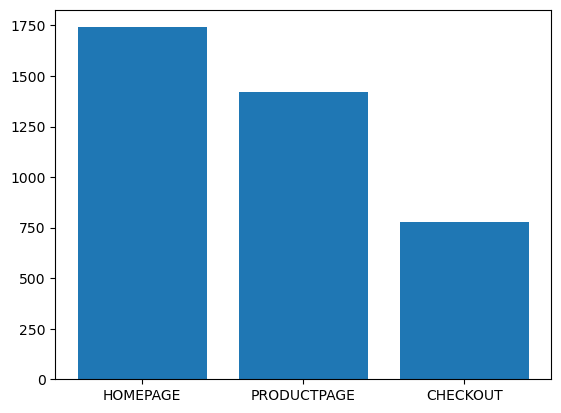

In [21]:
plt.bar(x=stage_frequency.index,height=stage_frequency.values)
plt.show

In [22]:
data_2023 = customer_journey_df[(customer_journey_df.VisitDate>="2023-01-01") & (customer_journey_df.VisitDate<="2023-12-31")]

In [23]:
data_2024 = customer_journey_df[(customer_journey_df.VisitDate>="2024-01-01") & (customer_journey_df.VisitDate<="2024-12-31")]

In [24]:
data_2025 = customer_journey_df[(customer_journey_df.VisitDate>="2025-01-01") & (customer_journey_df.VisitDate<="2025-12-31")]

In [33]:
stage_freq_2023 = data_2023['Stage'].value_counts()

In [34]:
stage_freq_2024 = data_2024['Stage'].value_counts()

In [35]:
stage_freq_2025 = data_2025['Stage'].value_counts()

<BarContainer object of 3 artists>

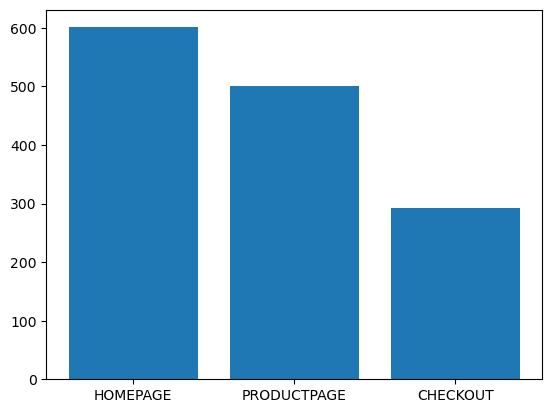

In [28]:
plt.bar(x=stage_freq_2023.index,height=stage_freq_2023.values)

<BarContainer object of 3 artists>

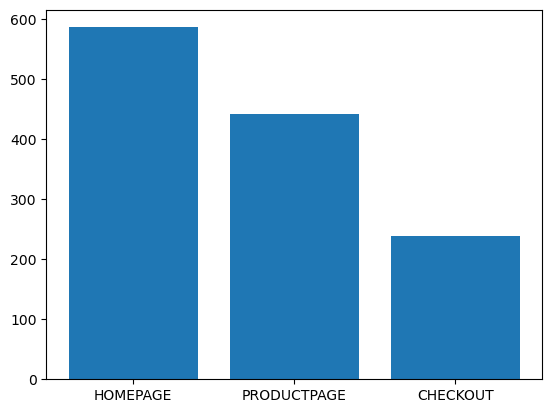

In [29]:
plt.bar(x=stage_freq_2024.index,height=stage_freq_2024.values)

<BarContainer object of 3 artists>

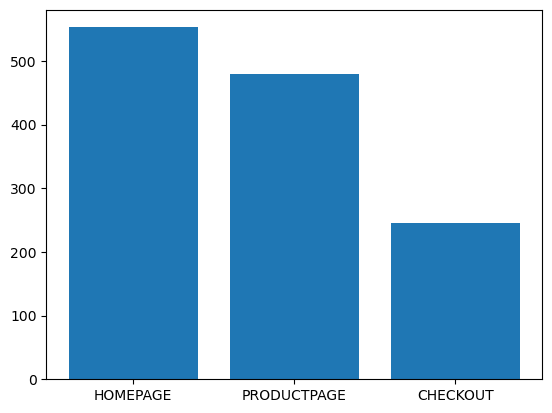

In [30]:
plt.bar(x=stage_freq_2025.index,height=stage_freq_2025.values)

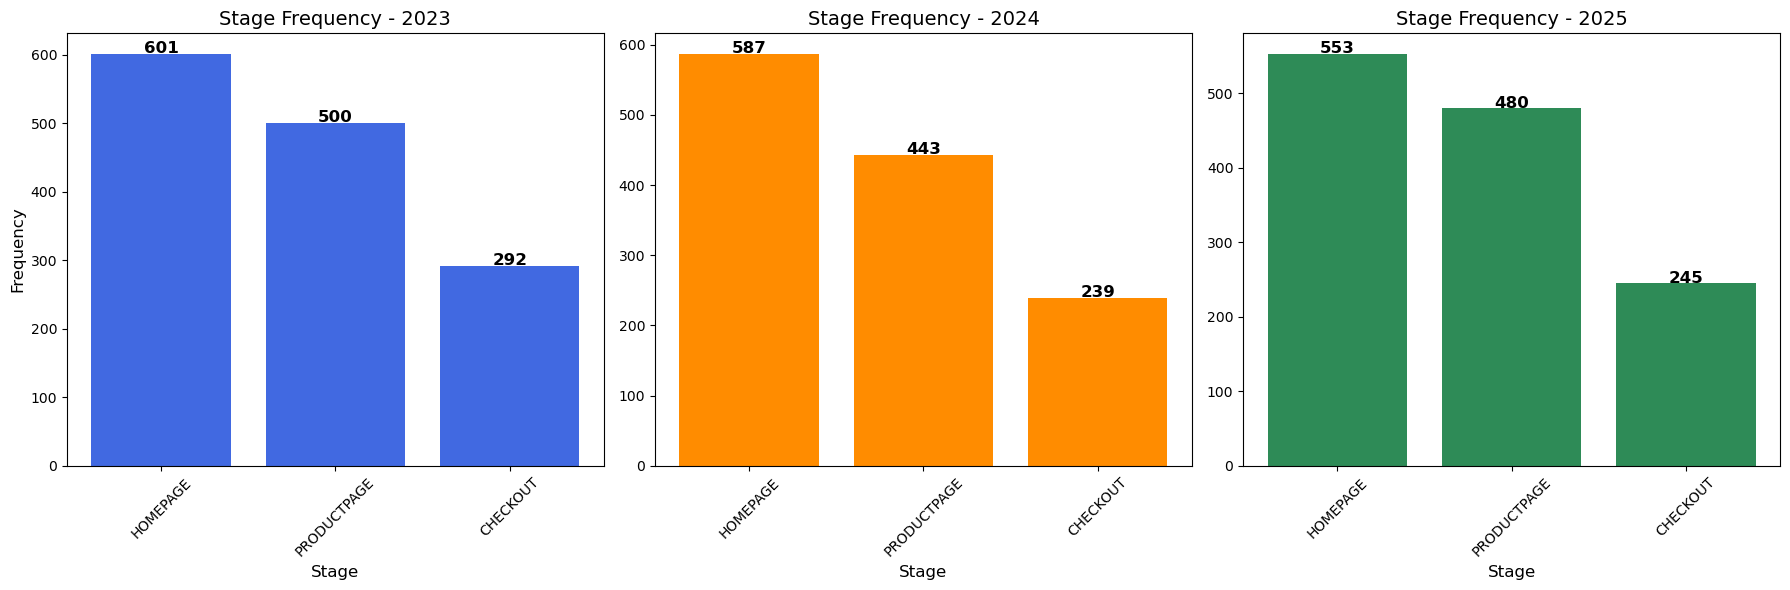

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Year 2023
axes[0].bar(stage_freq_2023.index, stage_freq_2023.values, color='royalblue')
axes[0].set_title("Stage Frequency - 2023", fontsize=14)
axes[0].set_xlabel("Stage", fontsize=12)
axes[0].set_ylabel("Frequency", fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Add labels inside bars for 2023
for i, v in enumerate(stage_freq_2023.values):
    axes[0].text(i, v + 1, str(v), ha='center', fontsize=12, fontweight='bold')

# Year 2024
axes[1].bar(stage_freq_2024.index, stage_freq_2024.values, color='darkorange')
axes[1].set_title("Stage Frequency - 2024", fontsize=14)
axes[1].set_xlabel("Stage", fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

# Add labels inside bars for 2024
for i, v in enumerate(stage_freq_2024.values):
    axes[1].text(i, v + 1, str(v), ha='center', fontsize=12, fontweight='bold')

# Year 2025
axes[2].bar(stage_freq_2025.index, stage_freq_2025.values, color='seagreen')
axes[2].set_title("Stage Frequency - 2025", fontsize=14)
axes[2].set_xlabel("Stage", fontsize=12)
axes[2].tick_params(axis='x', rotation=45)

# Add labels inside bars for 2025
for i, v in enumerate(stage_freq_2025.values):
    axes[2].text(i, v + 1, str(v), ha='center', fontsize=12, fontweight='bold')

# Adjust layout
plt.tight_layout()
plt.show()
